In [31]:
import pandas as pd
df = pd.read_csv('Comment2.csv')

In [32]:
len(df)

2

In [33]:
df

,title,username,date,star,comment
0,藍象廷 台北站前店,安安過生活愛食記部落客(243篇食記),2022/07/29,5.0,湯底、醬料、米粉湯甚至還有月亮蝦餅，泰國官方認證，超高CP值泰式火鍋吃到飽
1,藍象廷 台北站前店,小食P愛食記部落客(310篇食記),2022/04/29,5.0,新店報報-泰式火鍋吃到飽


In [34]:
df.groupby('title').count().sort_values(['comment'],ascending=False)

,username,date,star,comment
title,,,,
藍象廷 台北站前店,2,2,2,2


In [35]:
df1 = df['comment']
df1.to_csv('pandas.txt', header=None, index=None, sep='\t')

In [36]:
import jieba
#jieba.load_userdict("dict.txt.big.tw")
jieba.add_word("CP值")
jieba.add_word("必比登")
jieba.add_word("吃到飽")

In [37]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from wordcloud import WordCloud
#from scipy.misc import imread
from collections import Counter
import matplotlib.pyplot as plt

data={}
text_file = open('pandas.txt','r',encoding='utf-8')      #  開啟文件
text_list = text_file.read()

In [39]:
punctuation = set()
with open ('punctuation_zh_tw.txt', 'r',encoding='utf-8') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
with open ('punctuation_en.txt', 'r',encoding='utf-8') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
punctuation.add('\n')
punctuation.add(' ')
print(punctuation)

{'/', '?', '(', '}', '，', '〔', '[', '~', '！', '、', '』', ';', '{', '❤', '｜', '·', '...', '”', '.', '】', '|', '。', '（', "'", ']', ',', '》', '：', '《', ':', '──', '“', '【', '…', '‘', '✖', '．', '\n', '〕', '’', '_', '「', '『', '～', '；', '」', '"', ')', '？', '*', '!', '@', '–', '#', '）', '︱', '-', ' ', '│', '—'}


In [40]:
with open('stopwords_zh_tw.txt',encoding='utf-8') as file:    #加入停用詞表
    stopwords = {line.strip() for line in file}

In [41]:
word_list = [word for word in jieba.cut(text_list, cut_all=False) if word not in punctuation and word not in stopwords]

In [42]:
word_list

['湯底',
 '醬料',
 '米粉',
 '湯',
 '甚至',
 '月亮',
 '蝦餅',
 '泰國',
 '官方',
 '認證',
 '超高',
 'CP值',
 '泰式',
 '火鍋',
 '吃到飽',
 '新店',
 '報報',
 '泰式',
 '火鍋',
 '吃到飽']

In [43]:
for word in word_list: 
    if len(word)>=2:
        if not data.__contains__(word):
            data[word]=0
        data[word]+=1
data

{'湯底': 1,
 '醬料': 1,
 '米粉': 1,
 '甚至': 1,
 '月亮': 1,
 '蝦餅': 1,
 '泰國': 1,
 '官方': 1,
 '認證': 1,
 '超高': 1,
 'CP值': 1,
 '泰式': 2,
 '火鍋': 2,
 '吃到飽': 2,
 '新店': 1,
 '報報': 1}

In [44]:
all_special_label = pd.read_csv('all_special_label.txt', sep=",",header=None)
all_special_label = all_special_label[0].values.tolist()

special_label = [word for word in word_list if word in all_special_label]
special_label = list(set(special_label))
special_label

['CP值']

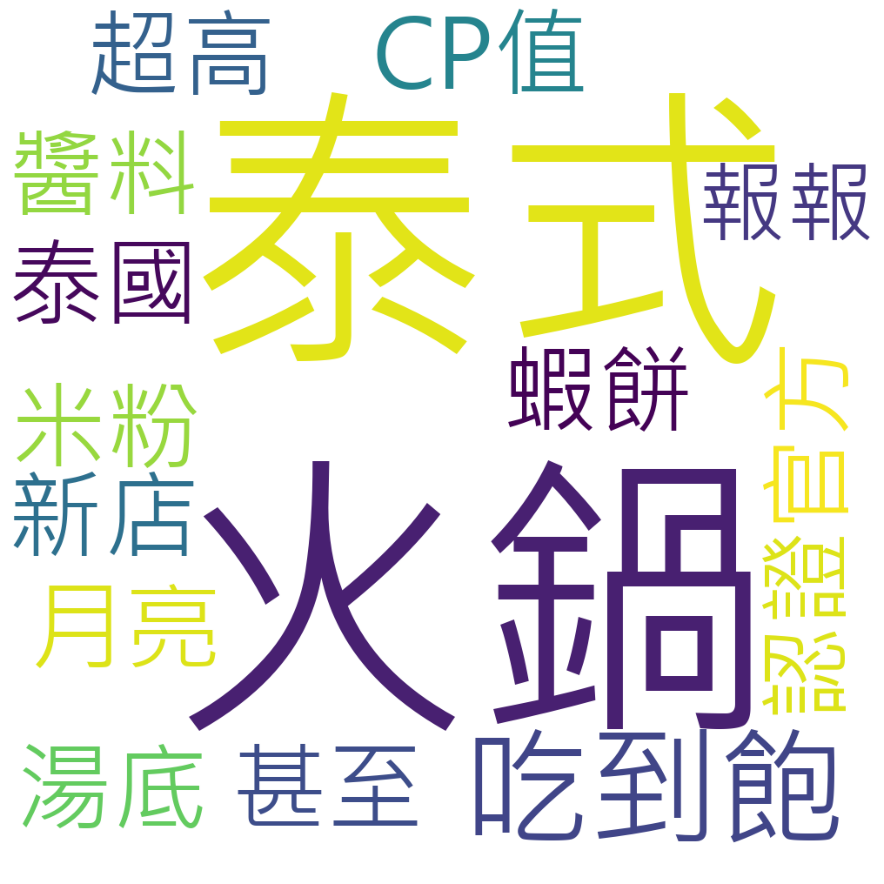

In [45]:
from wordcloud import WordCloud

my_wordcloud = WordCloud(  
    background_color='white',  
    max_words=60,  
    font_path=r'MicrosoftJhengHeiRegular.ttf',   #字體
    width=1000,
    height=1000
).generate_from_frequencies(data)

plt.figure(figsize=(18,16))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()  
my_wordcloud.to_file('result.jpg')
text_file.close()